#WEB SCRAPING

https://scrapeops.io/blog/the-state-of-web-scraping-2022/


In [1]:
# Import necessary libraries
from bs4.element import NavigableString
import spacy
import requests
from bs4 import BeautifulSoup
import re

# Get_article_text function
# -------
# Given an url string and a day string, extract textual information regarding headline, body, kicker and stand-first.
# Returns a dictionary object with all extracted data structured accordingly.
# -------
def get_article_text(url, day_str):
    # Send request to given url string
    res = requests.get(url, verify=False)
    # Extract content from the request
    html_page = res.content
    # Use library BeautifulSoup to parse the HTML content 
    soup = BeautifulSoup(html_page, 'html.parser')

    # Checking if the page exists by finding the error message in the title
    text = soup.find('title')
    errormessage = 'Página no encontrada o de acceso restringido'
    # If the error message is found we classify the link as not valid and return None
    if errormessage in text:
        return None

    # Finding the link to each article inside the tag for each article
    text = soup.find_all(class_ =  "content-item")
    links = []
    for tag in text[0:-1]:
        t = str(tag)
        # Locate start and end references that define the html string
        start = t.find('<a href=')
        end = t.find('.html')
        # Extract html string
        link = t[start+9:end+5]
        # Append to list of links
        links.append(link)

    output = {'day':[],
            'link':[],
            'kicker':[],
            'headline': [],
            'standfirst':[],
            'body':[]}

  # Extracting text of each article and storing not valid links
  notincluded = []
  for l in links:
    # Safety check
    # If string is not valid, skip to next one
    if len(l) == 0:
      continue
    # Request content to link
    res = requests.get(l, verify=False)
    html_page = res.content
    # Extract HTML through parser
    soup = BeautifulSoup(html_page, 'html.parser')
    
    # HEADLINE EXTRACTTION
    # Create empty string to store text
    x = ''
    # Find headline section through possible tag class names
    text =  soup.find(class_ =  ["ue-c-article__headline js-headline js-headlineb",
                                'ue-c-article__headline js-headline js-headlineb ue-c-article__headline--opinion',
                                 'entry-hero'])
    # If there is not a match, it is not considered a news article, so we add it to non valid links and move 
    # to the next one
    if text is None:
      notincluded.append(l)
      continue
    # If there is a match, append text to empty string and store correspondly
    for tag in text:
      x += str(tag)
    output['headline'] += [x]

    # STANDFIRST EXTRACTION
    # Find standfirst section through class name
    text =  soup.find(class_ =  "ue-c-article__standfirst")
    # Empty string to store text
    x = ''
    # If there exists a stand-first
    if text:
        # Add textual information to empty string
      for tag in text:
        x += str(tag)
        # Add to output dictionary
      output['standfirst'] += [x]
    # If there is no stand-first we label it
    else:
        # Add to output dictionary
      output['standfirst'] += ['no standfirst']

    # BODY EXTRACTION
    # If there exists a body section with the tag below
    if soup.find(class_ =  "ue-c-article__body"):
        # Extract information from section
      text = soup.find(class_ =  "ue-c-article__body")
        # Create empty string
      x = ''
        # For each piece of text check type of data and extract text accordingly
      for tag in text:
        if type(tag) is NavigableString:
          x += tag
        else:
          x += tag.get_text()
    # If the above tag does not exist, it corresponds to the other tag name
    else:
        # Extract information from section
      text = soup.find(class_ =  "entry-content")
        # Create empty string
      x = ''
        # For each piece of text extract piece of text from HTML text tags
      for tag in text:
        if '<p>' in str(tag):
          x += tag.get_text()
    
    # Add to output dictionary
    output['body'] += [x]

    # KICKER EXTRACTION
    # Create safety check to make sure we always add a value to the output dictionary
    is_kicker = False
    # If not found with first tag, it corresponds to second tag
    if soup.find(class_ =  ['ue-c-article__kicker-seo']) is None:
        # Extract information from section
      text = soup.find(class_ =  ['ue-c-article__kicker'])
        # If there is no text, no kicker
      if text is None:
        output['kicker'] += ['no kicker']
        is_kicker = True
        # If there is a kicker, we extract its text
      else:
        for tag in text:
          output['kicker'] += [str(tag)]
          is_kicker = True
    # Find information in first tag
    else:
        # Extract information from section
      text = soup.find(class_ =  ['ue-c-article__kicker-seo'])
    # If there is no text, no kicker
      if text is None:
        output['kicker'] += ['no kicker']
        is_kicker=True
        # If there is a kicker, we extract its text
      else:
        for tag in text:
          output['kicker'] += [str(tag)]
          is_kicker=True
    # If not kicker found in both tags, no kicker label
    if not is_kicker:
      output['kicker'] += ['no kicker']
    
    # Add to output dictionary the link and string of the corresponding day
    output['link'] += [l]
    output['day'] += [day_str]
    
    # Return output dictionary
  return output

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Create dictionary with all year days
year2022 = {'01':list(np.arange(17,32)),
            '02':list(np.arange(1,29)),
            '03':list(np.arange(1,32)),
            '04':list(np.arange(1,31)),
            '05':list(np.arange(1,32)),
            '06':list(np.arange(1,31)),
            '07':list(np.arange(1,32)),
            '08':list(np.arange(1,32)),
            '09':list(np.arange(1,31)),
            '10':list(np.arange(1,32)),
            '11':list(np.arange(1,12))}

# year2022 = {'10':list(np.arange(2,32)),
#            '11':list(np.arange(1,31)),
#            '12':list(np.arange(1,18))}

# Create empty pandas dataframe with corresponding column names for each section
df2022 = pd.DataFrame(columns = ['day','link','kicker','headline','standfirst','body'])

# For each month of the year
for month in year2022.keys():
    # For each day of the month
  for day in year2022[month]:
    # Create day string
    d = str(day)
    # If it is a 1 digit day number we append a 0 before
    if len(d) == 1:
      d = '0' + d
    # For each possible tab of news articles
    for n in range(1,7):
        # For the first tab, the link only ends with 'noticias.html'
      if n == 1:
        url = 'https://www.marca.com/hemeroteca/2022/' + str(month) + '/' + str(d) + '/noticias.html'
        # For the next tabs, the link ends with 'noticias' plus the tab number
      else:
        url = 'https://www.marca.com/hemeroteca/2022/' + str(month) + '/' +str(d) + '/noticias'+ str(n) + '.html'
        # Construct full day string
      day_str = '2022/' + str(month) + '/' + str(d)
        # Call text scraping function
      news = get_article_text(url, day_str)
        # If link is not valid, move to the next one
      if news is None:
        continue
        # If link is valid
      else:
        # Create dataframe from output dictionary and append to total dataframe
        df = pd.DataFrame.from_dict(news)
        df2022 = pd.concat([df2022, df])
    print(day_str)

EDITAR SI LO DESEA LA LOCALIZACIÓN DONDE SE GUARDA EL FICHERO


In [ ]:
# Check number of articles extracted
print(len(df2022))

# Export dataframe to excel file in Google Drive
from google.colab import drive
drive.mount('drive')
df2022.to_excel('news_articles_4.xlsx')
!cp news_articles_4.xlsx "drive/My Drive/TFG"

#NO CORRER A PARTIR DE AQUÍ

# PREPROCESSING

https://medium.com/product-ai/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908
https://medium.com/towards-data-science/cleaning-preprocessing-text-data-by-building-nlp-pipeline-853148add68a



In [10]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [8]:
# Read files from drive
import pandas as pd
#df1 = pd.read_excel('/content/drive/My Drive/TFG/news_articles_1.xlsx')
df1 = pd.read_excel('news_articles_1.xlsx')
#df2 = pd.read_excel('/content/drive/My Drive/TFG/news_articles_2.xlsx')
df2 = pd.read_excel('news_articles_2.xlsx')
#df3 = pd.read_excel('/content/drive/My Drive/TFG/news_articles_3.xlsx')
df3 = pd.read_excel('news_articles_3.xlsx')
df = pd.concat([df1,df2,df3]).reset_index()

In [42]:
#aux = set()
#for index, row in df.iterrows():
    #if row['kicker'] != 'no kicker':
        #aux.add(row['kicker'])

#len(aux)


day  count
0    2022/01/17    258
1    2022/01/18    267
2    2022/01/19    250
3    2022/01/20    243
4    2022/01/21    222
..          ...    ...
253  2022/09/27    222
254  2022/09/28    234
255  2022/09/29    256
256  2022/09/30    243
257  2022/10/01    201

[258 rows x 2 columns]

In [19]:
# Append month column

# Import necessary library
import datetime

# Create empty list
months = []
# For each article
for index, row in df.iterrows():
    # Convert string to datetime object
    datee = datetime.datetime.strptime(row['day'], "%Y/%m/%d")
    # Extract month value
    months.append(datee.month)

# Append column to dataframe
df['month'] = months

<AxesSubplot:title={'center':'Number of news articles per month'}, xlabel='month'>

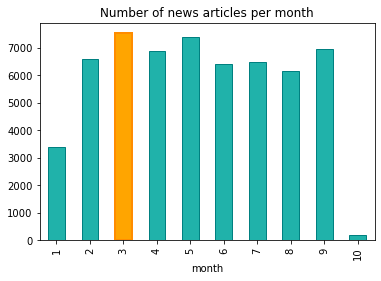

In [83]:
# Plot the number of articles per month
df_gb = df.groupby(['month']).size()
df_gb.plot(kind = 'bar', title='Number of news articles per month', 
           color=['lightseagreen','lightseagreen','orange','lightseagreen','lightseagreen','lightseagreen',
                 'lightseagreen','lightseagreen','lightseagreen','lightseagreen'],
          edgecolor=['teal','teal','darkorange','teal','teal',
                     'teal','teal','teal','teal','teal'],
          linewidth=[1,1,2,1,1,1,1,1,1,1])

In [51]:
# Append day of the week column

# Create auxiliary dataframe with count of articles per day
aux_df = df.groupby(['day']).size().to_frame().reset_index().rename(columns={0: 'count'})
# Create empty dataframe
day_week = []
# List of possible week days
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
# Start counter to find the end of each week and start again
counter = 0
for index, row in aux_df.iterrows():
    # If we are in day 7, start week again
    if counter%len(days) == 0:
        i = 0
    # Append corresponding week day
    day_week.append(days[i])
    i += 1
    counter += 1

# Append column to dataframe
aux_df['weekday'] = day_week

<AxesSubplot:title={'center':'Number of news articles per day of the week'}, xlabel='weekday'>

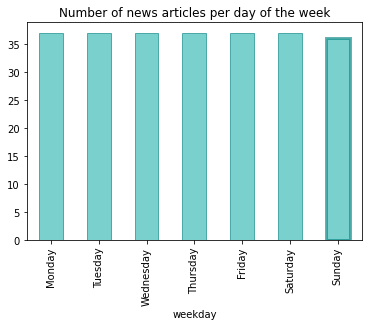

In [129]:
# Plot the number of articles per day of the week
df_gb = aux_df.groupby(['weekday']).size()
custom_dict = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday':3, 'Friday':4,'Saturday':5, 'Sunday':6} 
df_gb = df_gb.to_frame().sort_values(by=['weekday'], key=lambda x: x.map(custom_dict)).rename(columns={0: 'count'})
df_gb.plot(kind = 'bar', title='Number of news articles per day of the week', 
           color='lightseagreen',
          edgecolor='teal',
          linewidth=[1,1,1,1,1,1,3],
          legend=None,
          alpha=0.6)

In [110]:
df_gb

count
weekday         
Monday        37
Tuesday       37
Wednesday     37
Thursday      37
Friday        37
Saturday      37
Sunday        36

In [14]:
df.columns

Index(['index', 'Unnamed: 0', 'day', 'link', 'kicker', 'headline',
       'standfirst', 'body'],
      dtype='object')

In [9]:
# Step 1: Remove null values and join columns
df = df.dropna()
print(len(df))


joinedText = []
# For each article, add all text together
for index, row in df.iterrows():
    l = [row['kicker'],row['headline'],row['standfirst'],row['body']]
    joinedText.append(' '.join(l))

# Append column to dataframe
df['joinedText'] = joinedText

57932


In [97]:
s = 'físicamenteel'

for index, row in df.iterrows():
    if s in row['joinedText']:
        print((row['joinedText']))

f1 2021 fernando alonso se opera el asturiano ha vuelto a pasar por el quirófano. se le han quitado las placas de titanio de la mandíbula. ahora ya sólo piensa en estar al 100% de cara a la temporada 2022 fernando alonso ya ha pasado por el quirófano como tenía previsto hacer en este mes de enero de 2022. al asturiano le tenían que quitar las placas de titanio de la mandíbula. recordemos que el 11 de febrero de 2021 sufrió un accidente de bicicleta en suiza. el bicampeón mundial de f1 pasó un mal rato (sufrió una fractura en la mandíbula superior que requirió cirugía), pero fue capaz de sobreponerse para estar listo de cara al inicio de la temporada pasada.alonso desveló durante las 24 horas de le mans virtuales 2022 que ya ha sido operado con éxito y puede dar por finaliza un proceso que ha durado casi un año. el español, que actuó de capitán del equipo del alpine con el dorsal 36, confesó durante la retransmisión en directo de la carrera virtual: "me han operado la semana pasada y es

In [93]:
df['joinedText'][2]

'Salvados María Galiana: "Cuando el Sevilla ganó los siete paragüeros de Ikea, llamé a mi hijo el palangana y le di la enhorabuena" "Me cae muy bien, yo soy de los perdedores, lo reconozco", ha afirmado la actriz María Galiana, que se declara seguidora del Real Betis, a Gonzo en \'Salvados\' La actriz María Galiana ha sido la protagonista este domingo de \'Salvados\', donde entre otros asuntos, ha hablado con Fernando González González, más conocido como Gonzo, presentador del programa de entrevistas sobre temas de actualidad que se emite los domingos entre las 21.30 y las 22.30 horas en La Sexta, sobre el Real Betis Balompíé, club del que es reconocida aficionada, y el Sevilla Fútbol Club.Gonzo le ha preguntado a María Galiana qué le contaría a su marido, Rafael González Sandino, que murió en el año 2008, de la entidad verdiblanca. "Ay, qué lástima más grande. El Betis está como siempre, para arriba y para abajo, para arriba y para abajo. Cada vez que juega en Europa, baja a Segunda d

In [10]:
# Step 2: Convert to lowercase
df['joinedText'] = df['joinedText'].str.lower()

In [11]:
# Step 3: Remove specific html elements
# https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44

def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, ' ', text)

for index, row in df.iterrows():
  row['joinedText'] = remove_html_tags(row['joinedText'])

In [12]:
# Step 4: Remove numbers and special characters
# https://matiasbattocchia.github.io/datitos/Preprocesamiento-de-texto-para-NLP-parte-1.html#Expresiones-regulares

import string
import re

df['joinedText'] = df['joinedText'].str.replace(r'\d+',' ')
df['joinedText'] = df['joinedText'].replace(r'[,;.:¡!¿?@#$%&[\](){}<>~=+\-*/|\\_^`"\']', ' ', regex=True)
def normalize(texto):
    # todo a minúsculas
    texto = texto.lower()

    # tildes y diacríticas
    texto = re.sub('á', 'a', texto)
    texto = re.sub('é', 'e', texto)
    texto = re.sub('í', 'i', texto)
    texto = re.sub('ó', 'o', texto)
    texto = re.sub('ú', 'u', texto)
    texto = re.sub('ü', 'u', texto)
    texto = re.sub('ñ', 'n', texto)

    return texto
 
df['joinedText'] = df['joinedText'].apply(lambda x: normalize(x))

texts = df.joinedText.tolist()

/var/folders/cr/y_rrgmnj7h199fkhvxmytqqc0000gn/T/ipykernel_19863/4268926407.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['joinedText'] = df['joinedText'].str.replace(r'\d+',' ')


In [ ]:
! python -m spacy download es_core_news_md

In [13]:
# Step ?: tokenization, remove stopwords and lemmatize
# spacy over nltk, time wise. https://spacy.io/models/es

# Import necessary library
import spacy

# Create empty list for collection vocabulary
tokenized_text = []
# Load spacy spanish model
nlp = spacy.load("es_core_news_md")
# Start article counter
counter = 0
for article in texts:
    # Print amount of articles processed
  if counter%10000 == 0:
    print(counter, ' texts tokenized')
    # Create nlp document from each article
  doc = nlp(article)
    # Create empty list for article vocabulary
  tokenized_article = []
    # For each token in the article
  for token in doc:
    # Exclude stop words, white spaces and '\n' symbol
    if not token.is_stop and token.pos_ != 'PROPN' and ' ' not in str(token) and '\n' not in str(token): # 
        #tokenized_article.append(token.lemma_)
        tokenized_article.append(token.text)
  tokenized_text.append(tokenized_article)
  counter += 1

tokenized_text

0  texts tokenized
10000  texts tokenized
20000  texts tokenized
30000  texts tokenized
40000  texts tokenized
50000  texts tokenized


[['hubiera',
  'marcado',
  'penalti',
  'tecnico',
  'rueda',
  'prensa',
  'caer',
  'toral',
  'balance',
  'lamento',
  'jugadas',
  'terminaron',
  'resultando',
  'decisivas',
  'areas',
  'mostro',
  'orgulloso',
  'jugadores',
  'analisis',
  'partido',
  'efectivos',
  'presionamos',
  'cometimos',
  'error',
  'futbolistas',
  'supimos',
  'ordenar',
  'aparecio',
  'futbolista',
  'jugada',
  'colectiva',
  'teniamos',
  'partido',
  'controlado',
  'empezar',
  'jugada',
  'arbitro',
  'pito',
  'penalti',
  'verlas',
  'orgullo',
  'futbolistas',
  'competimos',
  'falta',
  'pizca',
  'suerte',
  'detalles',
  'competir',
  'partidos',
  'cerrarlos',
  'victoria',
  'tecnico',
  'marcha',
  'orgulloso',
  'competimos',
  'dignamente',
  'rival',
  'paso',
  'hubiera',
  'pesado',
  'marcado',
  'penalti',
  'hablo',
  'arbitro',
  'penalti',
  'digo',
  'llama',
  'llama',
  'momento',
  'clave',
  'creiamos',
  'podiamos',
  'peligro',
  'arbitro',
  'designaron'],
 ['or

In [14]:
import pickle
with open("pipe2-vocab", "wb") as fp:   #Pickling
    pickle.dump(tokenized_text, fp)

In [7]:
import pickle
with open("test", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

In [45]:
# Average number of words per article

counts = []
for i in b:
    counts.append(len(i))

print(sum(counts)/(len(counts)))

169.65350756058828


In [47]:
# Top 10 most common lemmas 

dictionary = {}
for article in b:
    for lemma in article:
        if lemma not in dictionary.keys():
            dictionary[lemma] = 1
        else:
            dictionary[lemma] += 1

dict_sorted = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))

first10pairs = {k: dict_sorted[k] for k in list(dict_sorted)[:10]}
first10pairs

{'equipo': 71976,
 'partido': 71260,
 'año': 69451,
 'jugador': 48250,
 'jugar': 42966,
 'temporada': 42114,
 'ganar': 36638,
 'club': 34896,
 'gol': 33845,
 'llegar': 33326}

In [55]:
# Top 10 least common lemmas
dict_sorted_asc = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=False))

last10pairs = {k: dict_sorted_asc[k] for k in list(dict_sorted_asc)[:30]}
last10pairs

{'balompíé': 1,
 'elyas': 1,
 'imer': 1,
 'torneoalcaraz': 1,
 'trigesimoprimer': 1,
 'metas': 1,
 'pierdear': 1,
 'autobotellazo': 1,
 'espejola': 1,
 'tokse': 1,
 'tijerasla': 1,
 'brugalés': 1,
 'aliñoefe': 1,
 'paisajesarabio': 1,
 'aparentementear': 1,
 'roadbookaunque': 1,
 'canceladás': 1,
 'reengancheque': 1,
 'recorridoque': 1,
 'reglamentariano': 1,
 'antonín': 1,
 'príbram': 1,
 'baráksufrió': 1,
 'niñosu': 1,
 'airesantonín': 1,
 'díaantonín': 1,
 'vidaantonín': 1,
 'barákcampeón': 1,
 'saltoluigi': 1,
 'delneri': 1}

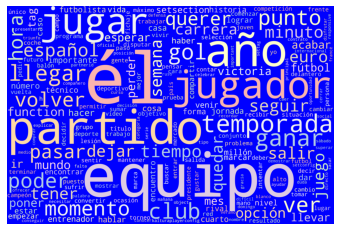

In [18]:
# Wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

article = []

for i in b:
    article.append(' '.join(i))

all_articles = ' '.join(article)

word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="blue",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(all_articles)

plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [19]:
# Word2vec model
import gensim
from gensim.models import Word2Vec

w2v_model = Word2Vec(min_count=1)

w2v_model.build_vocab(b, progress_per=10000)

# save model
# model.save("word2vec.model")


In [20]:
from time import time
t = time()

w2v_model.train(b, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 3.51 mins


In [32]:
# load model
#model = Word2Vec.load("word2vec.model")

vector = w2v_model.wv['deporte']  # get numpy vector of a word
sims = w2v_model.wv.most_similar('futbolista', topn=10)  # get other similar words
sims

[('jugador', 0.8673476576805115),
 ('centrocampista', 0.7846727967262268),
 ('atacante', 0.7455323338508606),
 ('canterano', 0.6965583562850952),
 ('zaguero', 0.69549560546875),
 ('mediocentro', 0.6939278244972229),
 ('delantero', 0.6930865049362183),
 ('ariete', 0.6778387427330017),
 ('club', 0.6413417458534241),
 ('central', 0.608585774898529)]

Preguntas carmen

- Nos interesa quitar los nombres propios? dos pipelines con y sin
- Nos interesa lematizar? perdemos genero de las palabras, no queremos lematizar
- quitar acentos
- textlife, textstudio
- subir a github el codigo


pipe1 - dejando propn y sin lemma
pipe2 - quitando propn y sin lemma